In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Buil X and Y

In [20]:
# build X and Y from dfAll
dfAll = pd.read_csv('All.csv',index_col=0)
df_ohc = pd.get_dummies(dfAll,columns=['events'])
df_ohc.head()

,date,trip_num,trip_dur,trip_dur_avg,mean_temperature_f,mean_wind_speed_mph,events_Fog,events_Fog-Rain,events_Rain,events_Rain-Thunderstorm,events_rain
0,2013-08-29,742,760268,1024.619946,68.0,11.0,0,0,0,0,0
1,2013-08-30,713,1789207,2509.406732,69.0,13.0,0,0,0,0,0
2,2013-08-31,638,1986155,3113.095611,64.0,15.0,0,0,0,0,0
4,2013-09-01,705,2336253,3313.834043,66.0,13.0,0,0,0,0,0
3,2013-09-02,658,2051061,3117.113982,69.0,12.0,0,0,0,0,0


In [17]:
X = np.array(df_ohc.iloc[:,4:])
Y = np.array(df_ohc[['trip_num','trip_dur_avg']])

In [21]:
from sklearn.model_selection import train_test_split
Xtr, Xts, Ytr, Yts = train_test_split(X, Y, train_size=500)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [30]:
Xtr_m = np.mean(Xtr[:,:2],axis=0)
Xtr_std = np.std(Xtr[:,:2],axis=0)
Xtr_scale = (Xtr[:,:2]-Xtr_m)/Xtr_std
Xts_scale = (Xts[:,:2]-Xtr_m)/Xtr_std

In [33]:
Xtr_scale = np.hstack((Xtr_scale,Xtr[:,2:]))
Xts_scale = np.hstack((Xts_scale,Xts[:,2:]))

In [35]:
nfea = Xtr_scale.shape[1]

In [ ]:
from keras.models import Model, Sequential
from keras.layers import Dense, Activation
import keras.backend as K

In [38]:
K.clear_session()
nh = 100
model = Sequential()
model.add(Dense(nh,input_shape=(nfea,),name='hidden'))
model.add(Dense(2,name='output'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
hidden (Dense)               (None, 100)               800       
_________________________________________________________________
output (Dense)               (None, 2)                 202       
Total params: 1,002
Trainable params: 1,002
Non-trainable params: 0
_________________________________________________________________


In [39]:
from keras import optimizers
opt = optimizers.Adam(lr=0.001)
model.compile(optimizer=opt,
                loss='mse',
                metrics=['accuracy'])

In [48]:
hist = model.fit(Xtr_scale, Ytr, epochs=1000, 
                 validation_data=(Xts_scale,Yts),
                verbose=0)

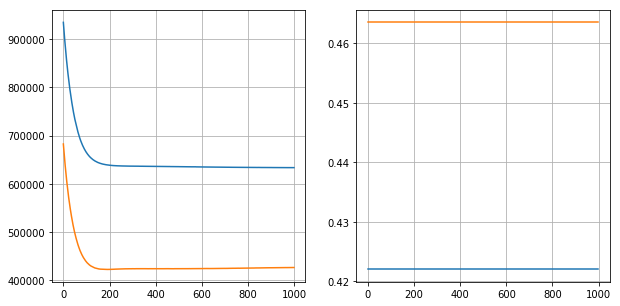

In [49]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.grid()
plt.subplot(1,2,2)
plt.plot(hist.history['acc'])
plt.plot(hist.history['val_acc'])
plt.grid()